# Model Evaluation

Below, the training and test data will be evaluated against different models. The evaluation will be accompanied with different accuracy checks to determine performance.

In [122]:
import pandas as pd
from sklearn.metrics import  root_mean_squared_error

# I know it is hitchhiker's guide to the galaxy
r_state = 42

models = []

In [123]:
train_df = pd.read_csv('data/train_data.csv', index_col='Unnamed: 0')
test_df = pd.read_csv('data/test_data.csv', index_col='Unnamed: 0')

columns = train_df.columns

print (columns)


Index(['HOSP_COUNT_7DAY_AVG', 'DEATH_COUNT_7DAY_AVG', 'popularity_rating',
       'norm_hosp_count_7day_avg', 'norm_death_count_7day_avg',
       'norm_popularity_rating', 'y'],
      dtype='object')


In [124]:
X_train = train_df.drop(labels=['y', 'HOSP_COUNT_7DAY_AVG', 'DEATH_COUNT_7DAY_AVG', 'popularity_rating'], axis=1)
y_train = train_df['y'].apply( lambda x: 1.0 * x)

X_test = test_df.drop(labels=['y', 'HOSP_COUNT_7DAY_AVG', 'DEATH_COUNT_7DAY_AVG', 'popularity_rating'], axis=1)
y_test = test_df['y'].apply( lambda x: 1.0 * x)

In [125]:

y_train.info()

<class 'pandas.core.series.Series'>
Index: 204 entries, 0 to 203
Series name: y
Non-Null Count  Dtype  
--------------  -----  
204 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [126]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 52 entries, 204 to 255
Series name: y
Non-Null Count  Dtype  
--------------  -----  
52 non-null     float64
dtypes: float64(1)
memory usage: 832.0 bytes


In [127]:
X_train.head()

,norm_hosp_count_7day_avg,norm_death_count_7day_avg,norm_popularity_rating
0,0.000000,0.00000,0.000000
1,0.004785,0.00000,0.236559
2,0.069976,0.00129,0.387097
3,0.349880,0.04129,0.494624
4,0.845096,0.28000,0.655914


In [128]:
def plot_line(y1, y2):
    working_data = {
        'y_test' : y1,
        'y_pred': y2
    }

    working_df = pd.DataFrame(working_data)
    working_df.plot(kind="line")

In [129]:
def gen_model_entry(name, y1, y2):
    entry = {
        'model' : name,
        'rmse' : root_mean_squared_error(y1, y2)
    }    

    return entry

## Bsaeline

In [130]:
from sklearn.dummy import DummyRegressor

reg = DummyRegressor()
dum_model = reg.fit(X_train, y_train)

y_pred = dum_model.predict(X_test)

In [131]:
report = root_mean_squared_error(y_test, y_pred)
print(report)

1820.186046568848


In [132]:
models.append(gen_model_entry('Dummy Regressor', y_test, y_pred))

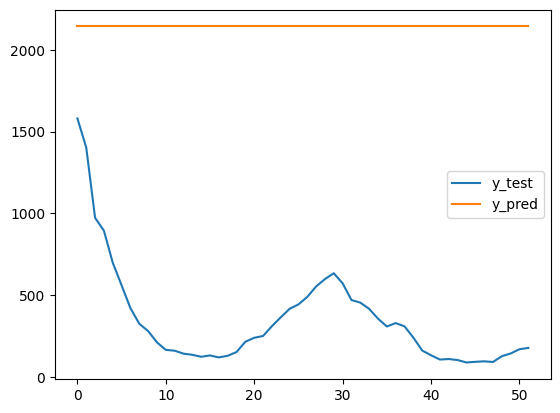

In [133]:
plot_line(y_test.to_list(), y_pred)

## Logistic Regression

In [134]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(random_state=r_state, max_iter=1000)
log_model = reg.fit(X_train, y_train)

y_pred = log_model.predict(X_test)

/home/mmcdougall/covid19-web-data-predictor/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1201: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  check_classification_targets(y)


In [135]:
report = root_mean_squared_error(y_test, y_pred )
print (report)

4204.563351974761


In [136]:
models.append(gen_model_entry('Logistic Regressor', y_test, y_pred))

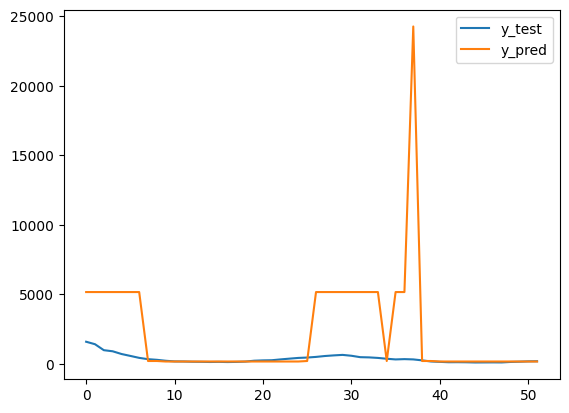

In [137]:
plot_line(y_test.to_list(), y_pred)

## Linear Regressor

In [138]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
linear_model = reg.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

In [139]:
report = root_mean_squared_error(y_test, y_pred)
print (report)

4992.383461484875


In [140]:
models.append(gen_model_entry('Linear Regressor', y_test, y_pred))

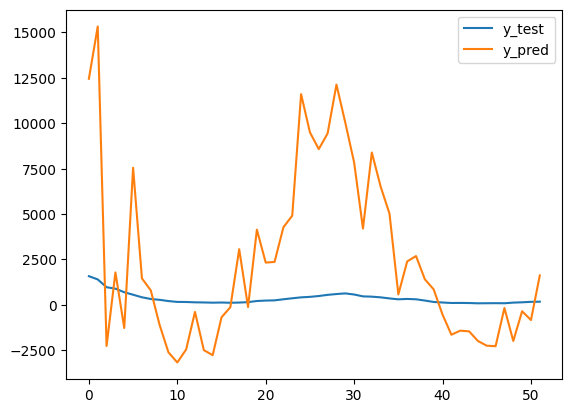

In [141]:
plot_line(y_test.to_list(), y_pred)

## Tree Regressor

In [142]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor()
dtree_model = reg.fit(X_train, y_train)

y_pred = dtree_model.predict(X_test)

In [143]:
report = root_mean_squared_error(y_test, y_pred)
print(report)

4569.467285059689


In [144]:
models.append(gen_model_entry('Tree Regressor', y_test, y_pred))

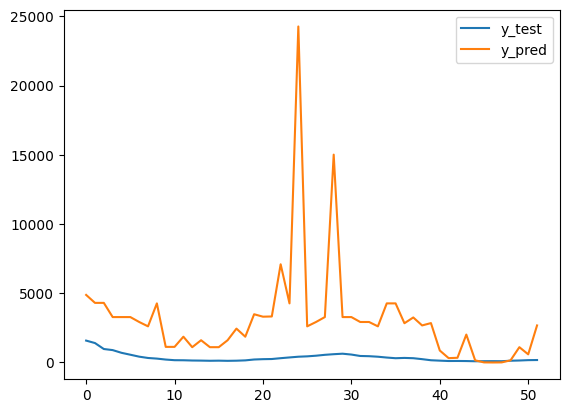

In [145]:
plot_line(y_test.to_list(), y_pred)

## Random Forest Regressor

In [146]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor()
rfg_model = reg.fit(X_train, y_train)

y_pred = rfg_model.predict(X_test)

In [147]:
report = root_mean_squared_error(y_test, y_pred)
print(report)

6500.243359307937


In [148]:
models.append(gen_model_entry('Random Forest Regressor', y_test, y_pred))

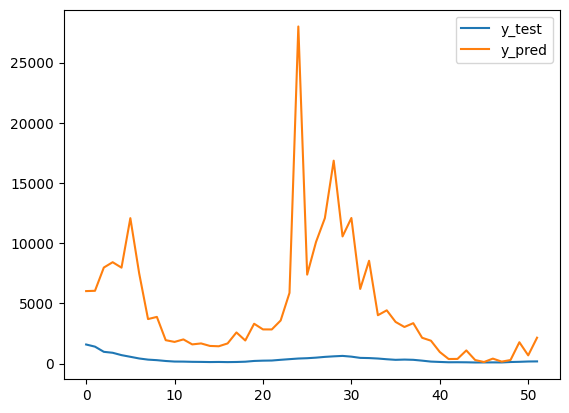

In [149]:
plot_line(y_test.to_list(), y_pred)

## Gradient Boost Regressor

In [150]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor()
gbr_model = reg.fit(X_train, y_train)

y_pred = gbr_model.predict(X_test)

In [151]:
report = root_mean_squared_error(y_test, y_pred)
print(report)

5701.828934448594


In [152]:
models.append(gen_model_entry('Gradient Boost Regressor', y_test, y_pred))

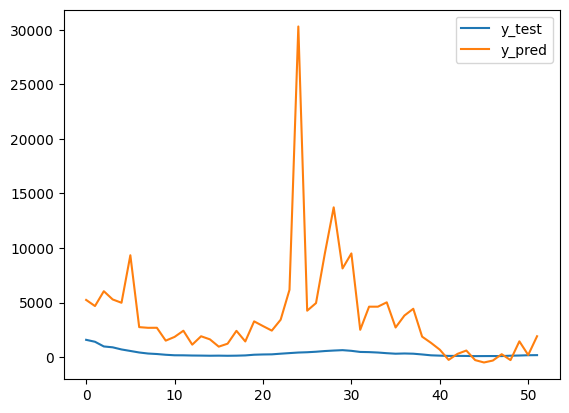

In [153]:
plot_line(y_test.to_list(), y_pred)

## XGBoost Regressor

In [154]:
import xgboost as xgb

reg = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=r_state)
xgb_model = reg.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

In [155]:
report = root_mean_squared_error(y_test, y_pred)
print(report)

4837.473836998477


In [156]:
models.append(gen_model_entry('XGBoost Regressor', y_test, y_pred))

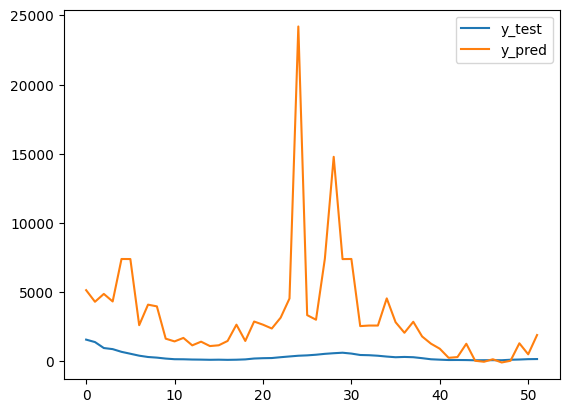

In [157]:
plot_line(y_test.to_list(), y_pred)

## Bayes Regressor

In [158]:
from sklearn.linear_model import BayesianRidge

reg = BayesianRidge()
br_model = reg.fit(X_train, y_train)

y_pred = br_model.predict(X_test)

In [159]:
report = root_mean_squared_error(y_test, y_pred)
print(report)

4954.052916985587


In [160]:
models.append(gen_model_entry('Bayes Regressor', y_test, y_pred))

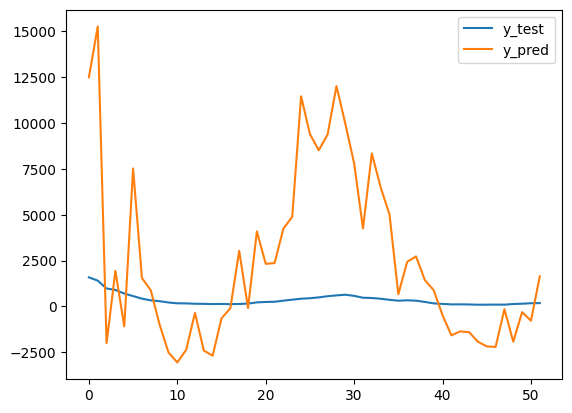

In [161]:
plot_line(y_test.to_list(), y_pred)

## Support Vector Regression

In [162]:
from sklearn.svm import SVR

reg = SVR()
svr_model = reg.fit(X_train, y_train)

y_pred = svr_model.predict(X_test)

In [163]:
report = root_mean_squared_error(y_test, y_pred)
print(report)

844.8362479912488


In [164]:
models.append(gen_model_entry('SVM Regressor', y_test, y_pred))

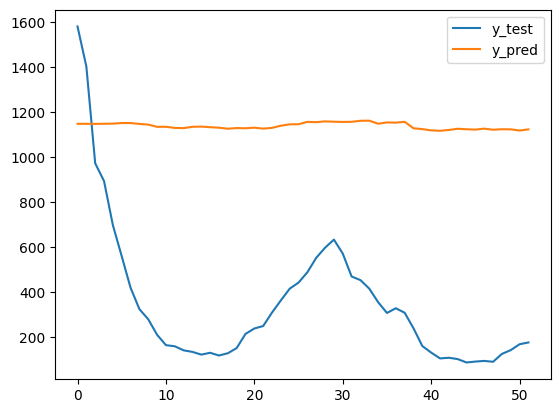

In [165]:
plot_line(y_test.to_list(), y_pred)

## SGD Regressor

In [166]:
from sklearn.linear_model import SGDRegressor

reg = SGDRegressor()
sgd_model = reg.fit(X_train, y_train)

y_pred = sgd_model.predict(X_test)

/home/mmcdougall/covid19-web-data-predictor/venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1612: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [167]:
report = root_mean_squared_error(y_test, y_pred)
print(report)

4370.394499927509


In [168]:
models.append(gen_model_entry('SGD Regressor', y_test, y_pred))

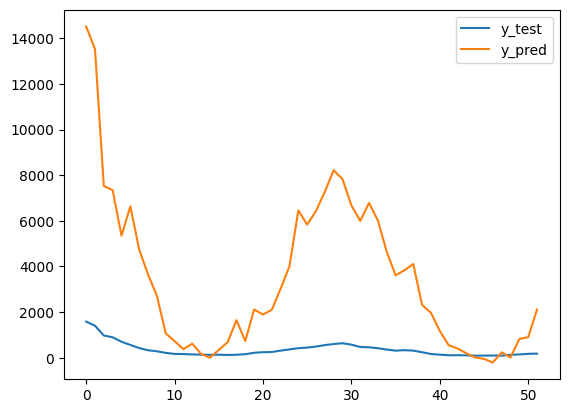

In [169]:
plot_line(y_test.to_list(), y_pred)

## Tabulate results

In [170]:
eval_df = pd.DataFrame(models)

In [171]:
eval_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   10 non-null     object 
 1   rmse    10 non-null     float64
dtypes: float64(1), object(1)
memory usage: 292.0+ bytes


In [173]:
eval_df.sort_values(by=['rmse'], axis=0, ascending=True)

,model,rmse
8,SVM Regressor,844.836248
0,Dummy Regressor,1820.186047
1,Logistic Regressor,4204.563352
9,SGD Regressor,4370.394500
3,Tree Regressor,4569.467285
6,XGBoost Regressor,4837.473837
7,Bayes Regressor,4954.052917
2,Linear Regressor,4992.383461
5,Gradient Boost Regressor,5701.828934
4,Random Forest Regressor,6500.243359


It appears that when comparing all models, the SVM regressor was the best at predicting the number of cases on new data. Unlike the other methods, used, it beat the Dummy Regressor which was used as the baseline for estimating the result. However, there is more that can be done to improve its performance. 

I will use a SHAP analaysis to identify the best predictors and I will also improve the model performance by tuning its hyperparameters through grid search.